In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/skumar6/scikit_learn_data


In [3]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
# disable Certificate issue on Mac
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
oliv['data'].shape

(400, 4096)

In [5]:
oliv['images'].shape

(400, 64, 64)

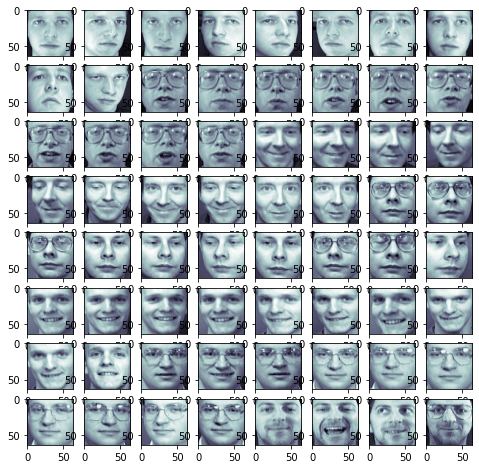

In [6]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()

In [7]:
x = oliv.data
y = oliv.target

In [8]:
pca = PCA()
pca.fit(x)

PCA()

In [9]:
pca.components_.shape

(400, 4096)

In [21]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.90:
    currentSum += pca.explained_variance_[k]
    k +=1
k

42

In [22]:
pca = PCA(n_components=k, whiten =True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 42)

In [23]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [24]:
x_approx_images = x_approx.reshape((400,64,64))

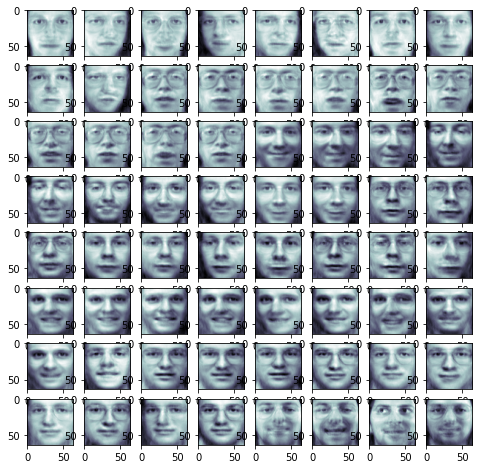

In [25]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

In [26]:
eigenv = pca.components_
eigenv.shape

(42, 4096)

In [28]:
eigen_faces = eigenv.reshape((42,64,64))

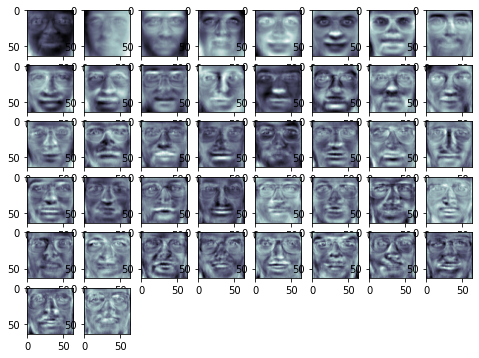

In [30]:
fig = plt.figure(figsize=(8,8))
for i in range(42):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigen_faces[i],cmap=plt.cm.bone)
plt.show()